# Подгрузим нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Часть 1. EDA

Загрузим и посмотрим на датасет 

In [2]:
data = pd.read_csv('data.csv',  index_col=0)
data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN


Посмотрите на базовые статистики датасета: средние, медианы, и т.д.

In [3]:
data.shape

(569, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
#Преобразуем целевую переменную в бинароный вид, где 1-М(злокачественная), 0-В(доброкачественная)
df = data['diagnosis'].map({'M': 1, 'B': 0})
data['diagnosis'] = df.values

In [7]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


In [8]:
data = data.drop('Unnamed: 32', axis=1) #удалим пустой столбец

Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

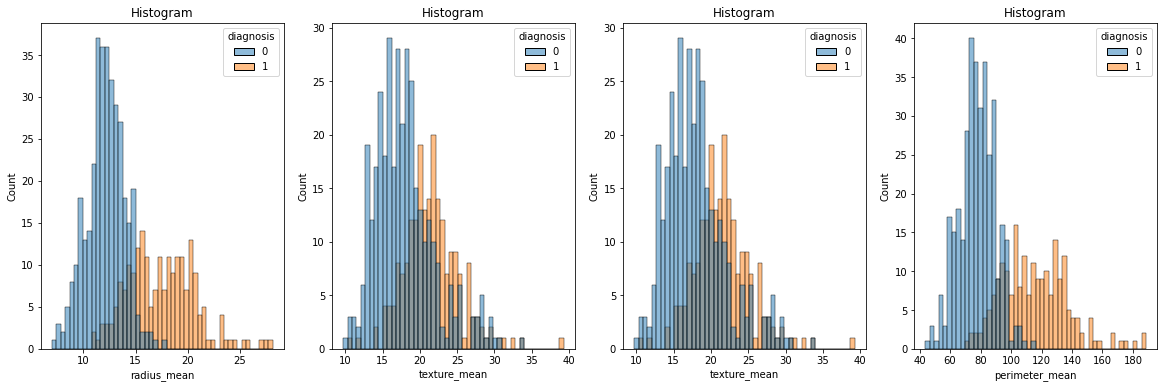

In [9]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1) # (rows, columns, panel number)
sns.histplot(data=data, x='radius_mean', hue='diagnosis', bins=50);
plt.title("Histogram");

# create the second panel and set current axis
plt.subplot(1, 4, 2)
sns.histplot(data=data, x='texture_mean', hue='diagnosis', bins=50);
plt.title("Histogram");

plt.subplot(1, 4, 3)
sns.histplot(data=data, x='texture_mean', hue='diagnosis', bins=50);
plt.title("Histogram");

plt.subplot(1, 4, 4)
sns.histplot(data=data, x='perimeter_mean', hue='diagnosis', bins=50);
plt.title("Histogram");

Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?                   
Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?

In [10]:
# Set up label column
y_column = "diagnosis"

# Select X columns
X_columns = data.columns[data.columns != y_column]

X_columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

ValueError: num must be 1 <= num <= 20, not 21

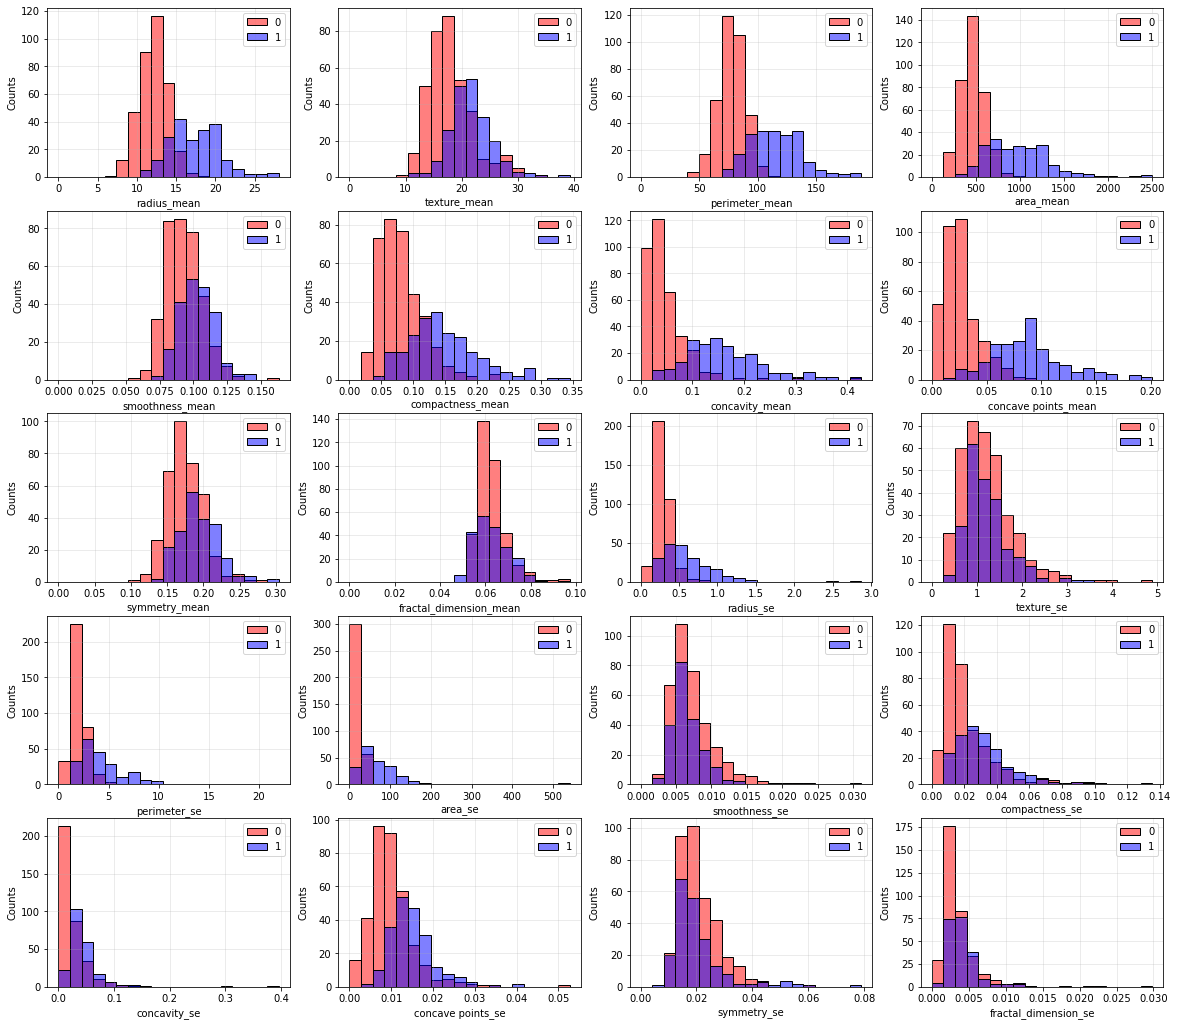

In [11]:
# Define size of the figure
plt.figure(figsize=(20, 18))

# For each column ...
for i_col in range(len(X_columns)):
    
    # Create subplot for each column
    plt.subplot(5, 4, i_col+1)
    
    # Get column and label values
    x_col = data[X_columns[i_col]].values
    y_col = data[y_column].values
    
    # Plot histograms
    bins = np.linspace(0, x_col.max(), 20)
    plt.grid(alpha = 0.3)
    sns.histplot(x_col[y_col == 0], bins=bins, color='r', alpha=0.5, label='0')
    sns.histplot(x_col[y_col == 1], bins=bins, color='b', alpha=0.5, label='1')
    
    # Labels and legend
    plt.xlabel(X_columns[i_col])
    plt.ylabel('Counts')
    plt.legend(loc='best')
    
plt.show()

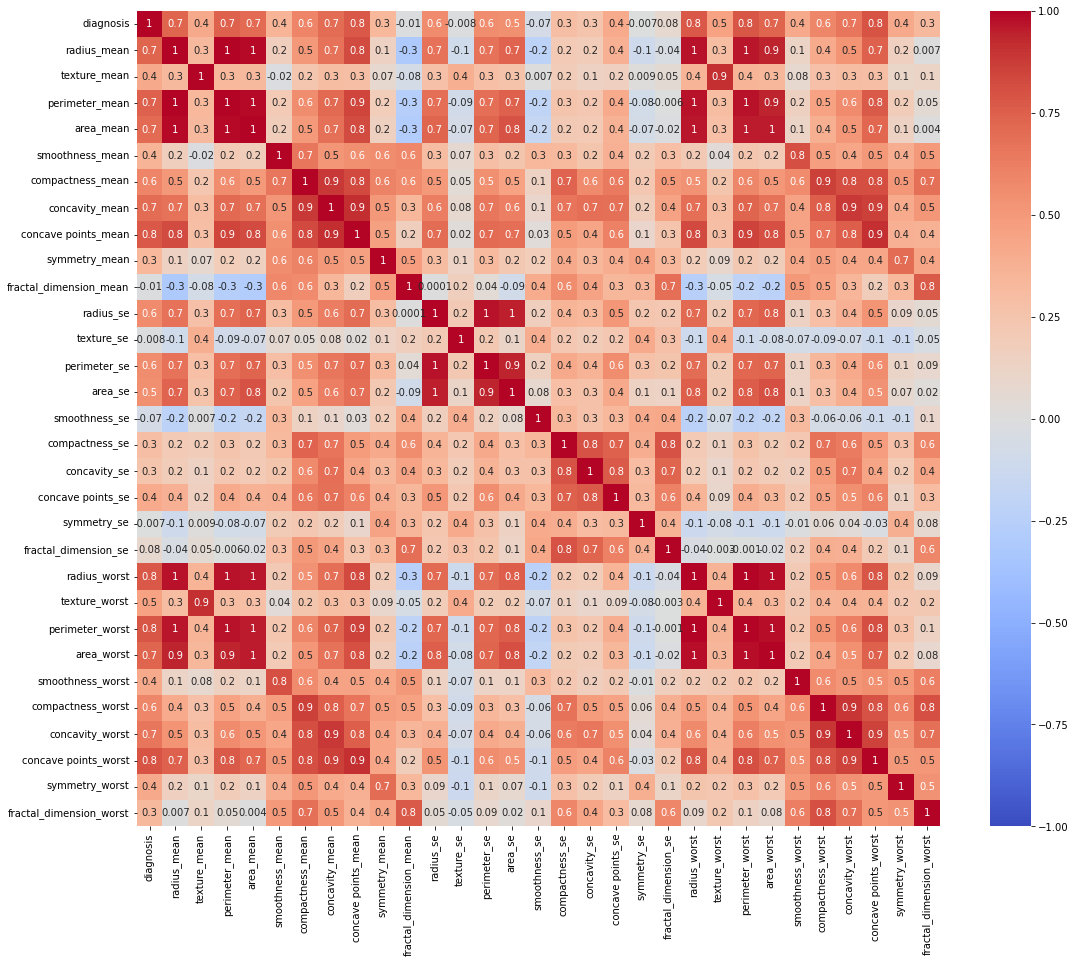

In [12]:
plt.subplots(figsize=(18,15))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1g')
plt.show()

In [13]:
k = 10
corrmat = data.corr()
cols = corrmat.nlargest(k, 'diagnosis')['diagnosis'].index.tolist()
cols

['diagnosis',
 'concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean']

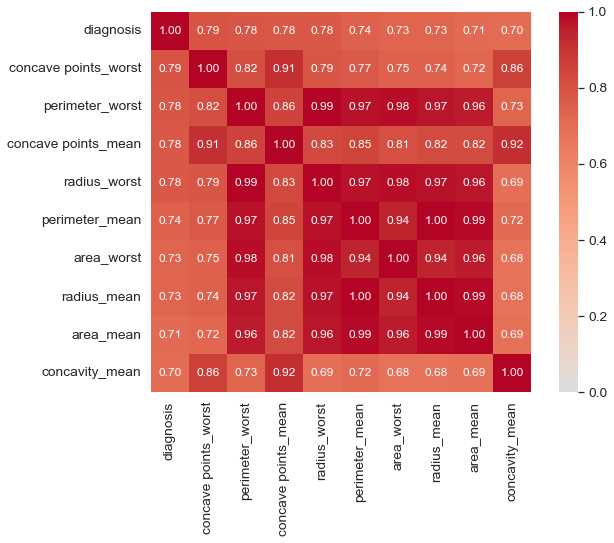

In [14]:
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=cols, xticklabels=cols, vmin=0, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

исходя из корреляционного анализа можно отметить, что некоторые признаки имеют сильную положительную корреляцию, а сильной отрицательной корреляции не выявлено. Если рассмотреть топ 10 сильно скоррелированных признаков, то можно отметить, что все эти признаки зависят друг от друга, так как perimeter_worst(Периметр "худших" или наибольших (среднее из трех
наибольших значений)), radius_worst, perimeter_mean', 'area_worst', 'radius_mean','area_mean' описывают одно и тоже, так как чем больше размер, тем больше периметр, тем больше площадь, тем больше область итд, по этому данные признаки сильно скоррелированы. Также со всеми признаками размера коррелируют признаки "вогнутости", что, по моим предположениям, также зависит от размера.

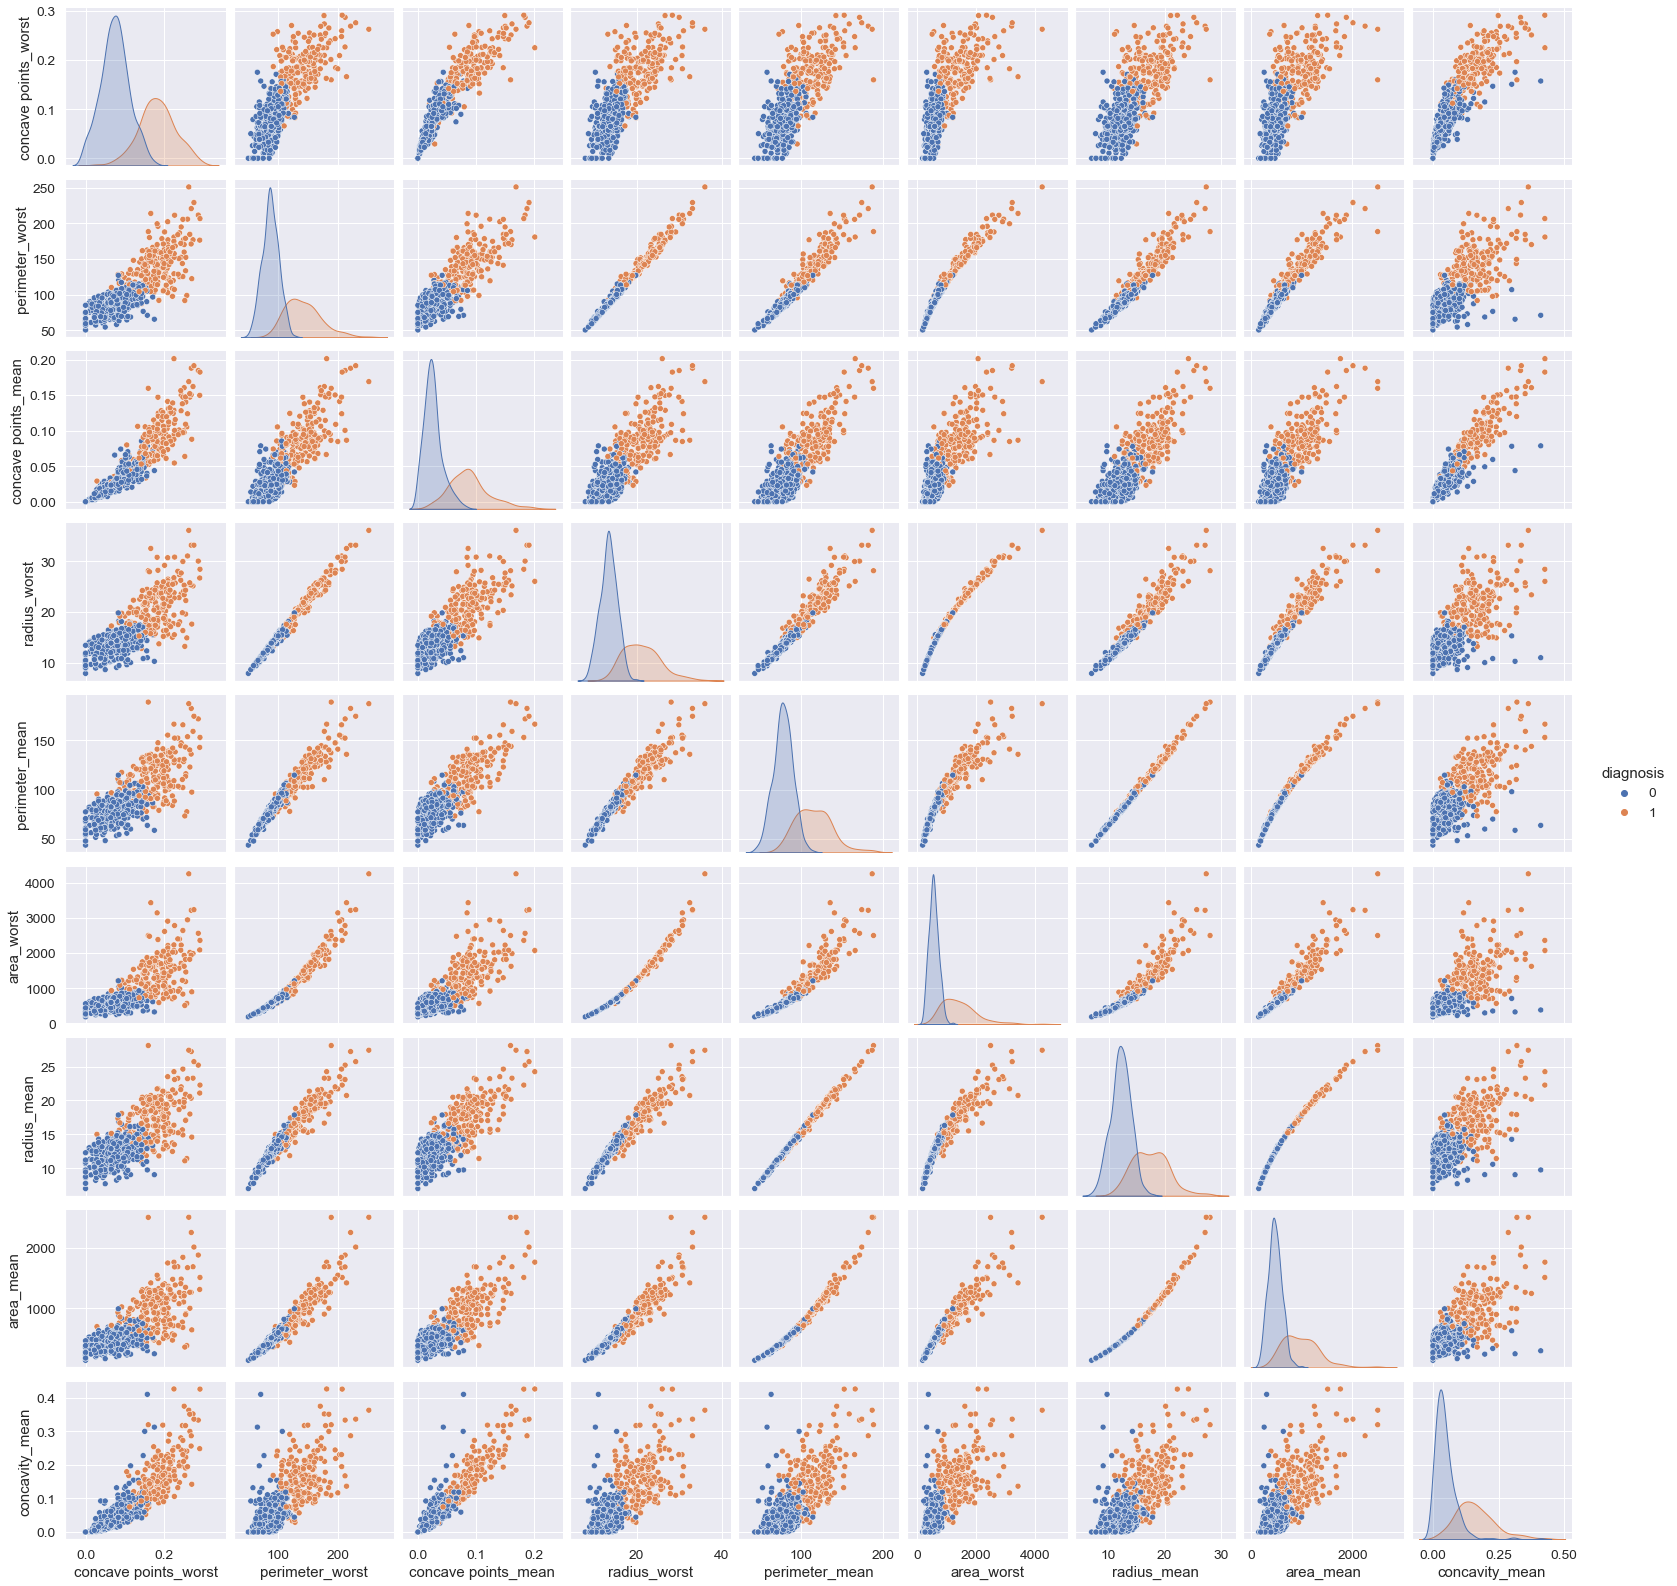

In [15]:
sns.pairplot(data=data[cols], hue='diagnosis')
plt.show()

После построения попарных зависимотей можно отметить, что линейная зависимость наблюдается. Где-то она ярко выраженная, как напрмер между 'perimeter_mean' и 'radius_mean', а где-то менее ярок выраженная, как между 'concave points_worst' и 'area_mean'.

Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

In [16]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [17]:
Xx_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [21]:
import plotly.express as px
for i in Xx_columns:
    df = data
    fig = px.box(df, x="diagnosis", y=i, points="all")
    fig.show()

Отличить злокачественную опухоль (1) от доброкачественной (0) с наибольшей вероятностью можно по следующим признакам: 
- concave points_worst (у доброкачественной опухоли вехний квантиль 0,097 а нижний 0,051, а у злокачественной 0,21 и 0,15 соотвественно)
По тем же сооброжениям можно выделить следующие признаки:
- perimetr_worst
- area_worst
- radius_meanworst
- concave points_worst
- concavity_mean
- area_mean
- perimetr_mean
- radius_mean

# Часть 2. Моделирование при помощи kNN

Разбейте данные на train-test, отложив 30% выборки для тестирования. Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
data.isna().sum().sum()

0

In [28]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.3, random_state=42, stratify=data['diagnosis']
)

# стандартизируем
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [30]:
y_train.value_counts(normalize=True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [39]:
X_train.min(axis = 0)

radius_mean                  6.981000
texture_mean                 9.710000
perimeter_mean              43.790000
area_mean                  143.500000
smoothness_mean              0.062510
compactness_mean             0.019380
concavity_mean               0.000000
concave points_mean          0.000000
symmetry_mean                0.106000
fractal_dimension_mean       0.050240
radius_se                    0.111500
texture_se                   0.360200
perimeter_se                 0.757000
area_se                      6.802000
smoothness_se                0.001713
compactness_se               0.002252
concavity_se                 0.000000
concave points_se            0.000000
symmetry_se                  0.007882
fractal_dimension_se         0.000895
radius_worst                 7.930000
texture_worst               12.020000
perimeter_worst             50.410000
area_worst                 185.200000
smoothness_worst             0.071170
compactness_worst            0.027290
concavity_wo

In [35]:
X_train_scaled.min(axis = 0)

array([-2.01353698, -2.25346708, -1.97053243, -1.44894978, -2.3185053 ,
       -1.55875886, -1.09167261, -1.23582899, -2.78199556, -1.7382423 ,
       -1.06122144, -1.54077621, -1.0487663 , -0.76984863, -1.80622394,
       -1.27971615, -0.97633041, -1.85505221, -1.48787565, -1.06574343,
       -1.72634335, -2.27624341, -1.69271112, -1.23271806, -2.56641664,
       -1.43102495, -1.30057782, -1.72711179, -2.09998831, -1.58278931])

Стандартизация здесь нужна, так как в алгоритме kNN используются вычисления расстояний. К примеру, признак area_mean представлен в диапазоне от 143 до 2500, а признак concave points_mean представлен в диапазоне от 0 до 0,2). В таком случае значения дистанции могут сильно зависеть от признаков с большими диапазонами. 


### Постройте модель kNN "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.

In [83]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [85]:
# учим knn
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, y_train)

print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.955
Precision: 0.885
Recall: 0.992
f1_score: 0.936

Test quality:
Accuracy: 0.947
Precision: 0.859
Recall: 1.000
f1_score: 0.924


In [86]:
predictions=knn.predict(X_test_scaled)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [87]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,predictions)

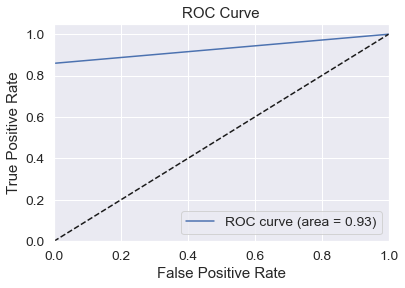

In [88]:
roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [89]:
roc_auc

0.9296875

### Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :)

In [90]:
from sklearn.model_selection import cross_val_score

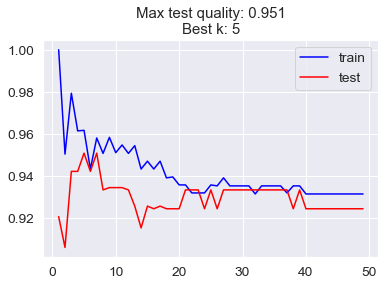

In [65]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

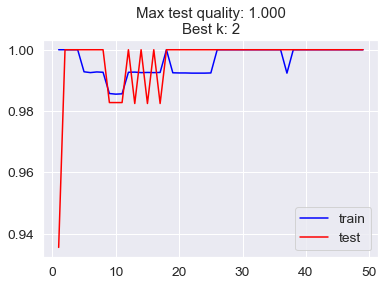

In [79]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(recall_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(recall_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

In [78]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1, 2, 5, 10, 15, 20, 30, 40, 50, 75, 100]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,cv = 5, scoring = 'accuracy')
clf1 = GridSearchCV(knn, parameters,cv = 5, scoring = 'precision')
clf2 = GridSearchCV(knn, parameters,cv = 5, scoring = 'recall')
clf3 = GridSearchCV(knn, parameters,cv = 5, scoring = 'f1')
clf.fit(X_train_scaled, y_train)
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_scaled, y_train)
clf3.fit(X_train_scaled, y_train)
print('Best params: ', clf.best_params_)
print('Best accuracy: ', clf.best_score_)
print('Best precision: ', clf1.best_score_)
print('Best recall: ', clf2.best_score_)
print('Best f1: ', clf3.best_score_)

Best params:  {'n_neighbors': 5}
Best accuracy:  0.9697468354430381
Best precision:  1.0
Best recall:  0.925057471264368
Best f1:  0.9563999209894657


In [91]:
param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 


test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best CV score: 0.960, best CV k: 5
Resulting test score: 0.959


In [92]:
# учим knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.972
Precision: 0.932
Recall: 0.993
f1_score: 0.962

Test quality:
Accuracy: 0.965
Precision: 0.906
Recall: 1.000
f1_score: 0.951


До настройки параметра числа соседей на кросс-валидации
Test quality:
Accuracy: 0.947
Precision: 0.859
Recall: 1.000
f1_score: 0.924

После настройки параметра числа соседей на кросс-валидации
Test quality:
Accuracy: 0.965
Precision: 0.906
Recall: 1.000
f1_score: 0.951

Результаты стали чуточку лучше!